In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [33]:
import datetime
import yfinance as yf
import pandas as pd

# Define the ticker symbols and date range
tickers = ['TSLA', 'DJT', 'TWTR', 'FOX','NIO', 'RIVN', 'GM', 'DIS', 'VIAC']
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2024, 8, 24)

# Download historical data from Yahoo Finance
data = yf.download(tickers, start=start, end=end)

# Flatten the multi-level columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]
data.reset_index(inplace=True)

# Create a DataFrame to store the required information
results = []

# Loop through each ticker and extract relevant data
for ticker in tickers:
    # Use .loc[] to avoid SettingWithCopyWarning
    ticker_data = data.loc[:, ['Date', f'Open_{ticker}', f'Close_{ticker}']].copy()
    ticker_data.rename(columns={f'Open_{ticker}': 'Starting Price', f'Close_{ticker}': 'Ending Price'}, inplace=True)
    ticker_data.loc[:, 'Stock Name'] = ticker
    ticker_data.loc[:, 'Price Change'] = ticker_data['Ending Price'] - ticker_data['Starting Price']
    results.append(ticker_data)

# Concatenate all results into a single DataFrame
final_df = pd.concat(results)

# Select and order the columns as needed
final_df = final_df[['Date', 'Stock Name', 'Starting Price', 'Ending Price', 'Price Change']]

# Display the final DataFrame
print(final_df)


[*********************100%***********************]  9 of 9 completed

                         Date Stock Name  Starting Price  Ending Price  \
0   2023-01-03 00:00:00+00:00       TSLA      118.470001    108.099998   
1   2023-01-04 00:00:00+00:00       TSLA      109.110001    113.639999   
2   2023-01-05 00:00:00+00:00       TSLA      110.510002    110.339996   
3   2023-01-06 00:00:00+00:00       TSLA      103.000000    113.059998   
4   2023-01-09 00:00:00+00:00       TSLA      118.959999    119.769997   
..                        ...        ...             ...           ...   
408 2024-08-19 00:00:00+00:00       VIAC             NaN           NaN   
409 2024-08-20 00:00:00+00:00       VIAC             NaN           NaN   
410 2024-08-21 00:00:00+00:00       VIAC             NaN           NaN   
411 2024-08-22 00:00:00+00:00       VIAC             NaN           NaN   
412 2024-08-23 00:00:00+00:00       VIAC             NaN           NaN   

     Price Change  
0      -10.370003  
1        4.529999  
2       -0.170006  
3       10.059998  
4        0.

In [34]:
nulls_by_ticker = final_df[final_df['Ending Price'].isnull()].groupby('Stock Name').size()

# Display tickers with null values
print("Stock tickers with null values:")
print(nulls_by_ticker)

Stock tickers with null values:
Stock Name
TWTR    413
VIAC    413
dtype: int64


In [27]:
# Filter out rows where 'Ending Price' is null
null_rows = final_df[final_df['Ending Price'].isnull()]

# Display the rows with null values
print("Rows with null values:")
print(null_rows)


Rows with null values:
                          Date Stock Name  Starting Price  Ending Price  \
0    2020-01-02 00:00:00+00:00       TMTG             NaN           NaN   
1    2020-01-03 00:00:00+00:00       TMTG             NaN           NaN   
2    2020-01-06 00:00:00+00:00       TMTG             NaN           NaN   
3    2020-01-07 00:00:00+00:00       TMTG             NaN           NaN   
4    2020-01-08 00:00:00+00:00       TMTG             NaN           NaN   
...                        ...        ...             ...           ...   
1164 2024-08-19 00:00:00+00:00       VIAC             NaN           NaN   
1165 2024-08-20 00:00:00+00:00       VIAC             NaN           NaN   
1166 2024-08-21 00:00:00+00:00       VIAC             NaN           NaN   
1167 2024-08-22 00:00:00+00:00       VIAC             NaN           NaN   
1168 2024-08-23 00:00:00+00:00       VIAC             NaN           NaN   

      Price Change  
0              NaN  
1              NaN  
2            

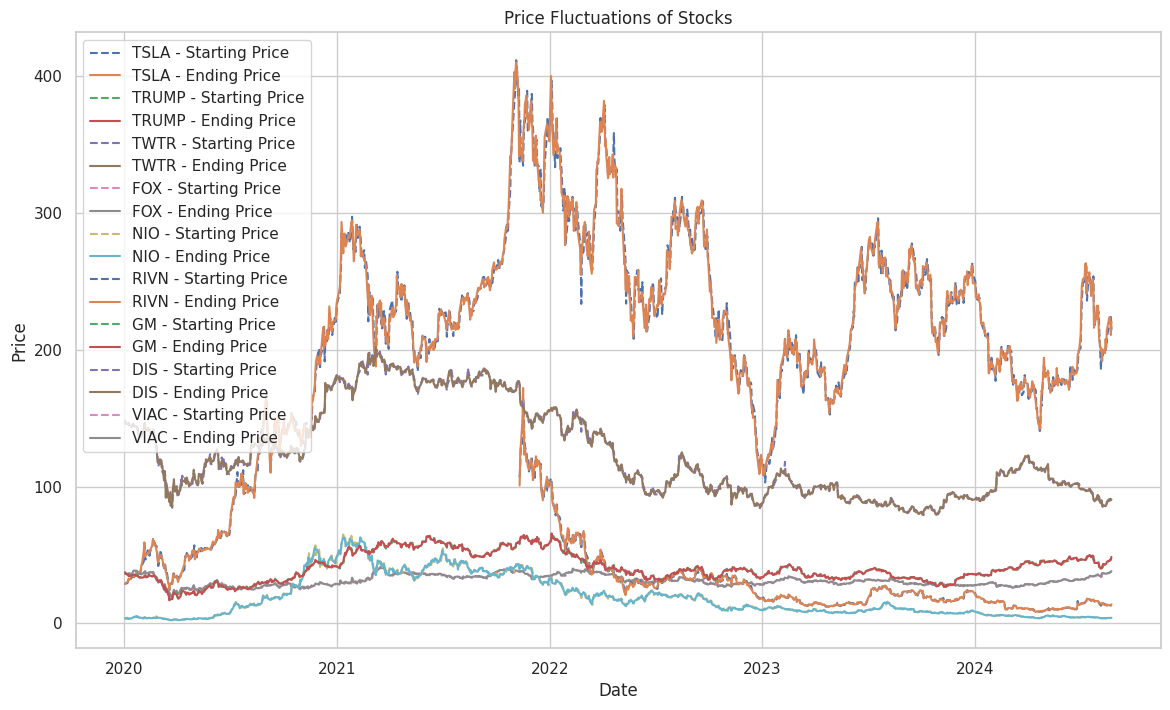

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Date' column is in datetime format
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Set the style for the plots
sns.set(style="whitegrid")

# Create a line plot for each stock's price fluctuations
plt.figure(figsize=(14, 8))

# Plot the starting and ending prices
for ticker in tickers:
    ticker_data = final_df[final_df['Stock Name'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Starting Price'], label=f'{ticker} - Starting Price', linestyle='--')
    plt.plot(ticker_data['Date'], ticker_data['Ending Price'], label=f'{ticker} - Ending Price')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Fluctuations of Stocks')
plt.legend()
plt.grid(True)
plt.show()


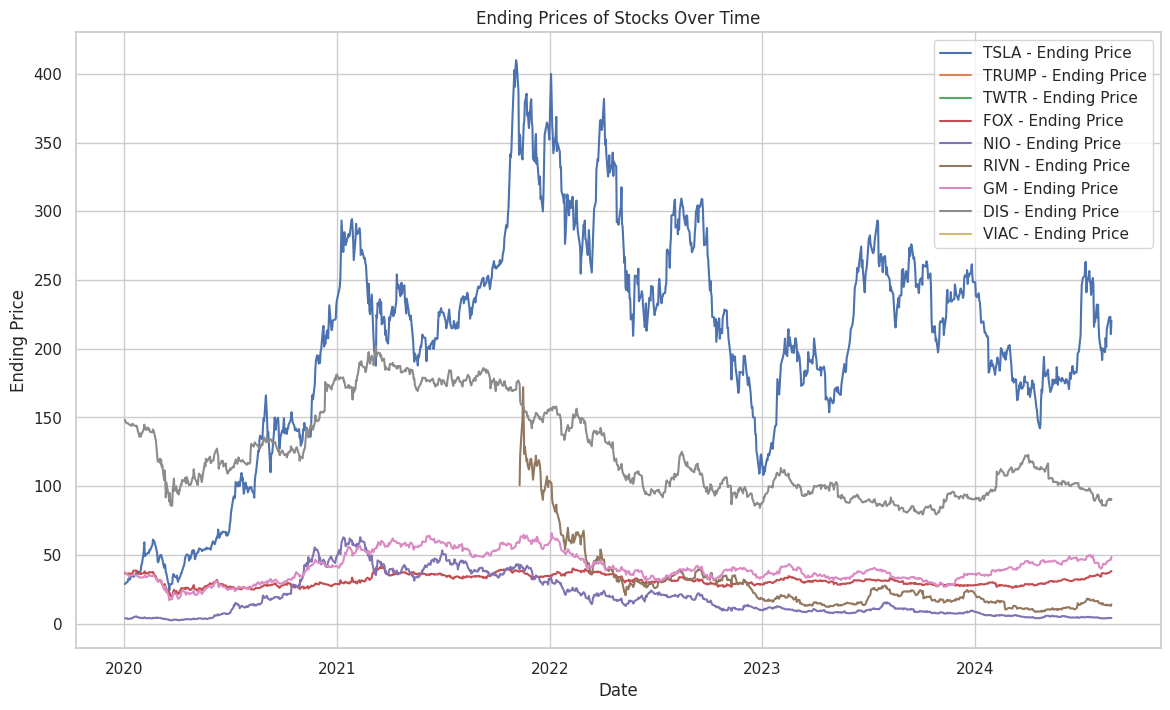

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Date' column is in datetime format
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Set the style for the plots
sns.set(style="whitegrid")

# Create a line plot for the ending prices of each stock
plt.figure(figsize=(14, 8))

# Plot the ending prices
for ticker in tickers:
    ticker_data = final_df[final_df['Stock Name'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Ending Price'], label=f'{ticker} - Ending Price')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Ending Price')
plt.title('Ending Prices of Stocks Over Time')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_612/813913776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Normalized Ending Price'] = ticker_data['Ending Price'].pct_change().fillna(0)
/tmp/ipykernel_612/813913776.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ticker_data['Normalized Ending Price'] = ticker_data['Ending Price'].pct_change().fillna(0)
/tmp/ipykernel_612/813913776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

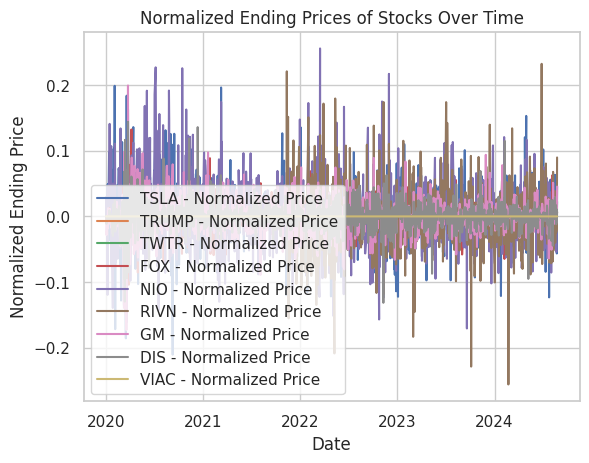

In [13]:
# Calculate percentage change for each stock
for ticker in tickers:
    ticker_data = final_df[final_df['Stock Name'] == ticker]
    ticker_data['Normalized Ending Price'] = ticker_data['Ending Price'].pct_change().fillna(0)
    plt.plot(ticker_data['Date'], ticker_data['Normalized Ending Price'], label=f'{ticker} - Normalized Price')

plt.xlabel('Date')
plt.ylabel('Normalized Ending Price')
plt.title('Normalized Ending Prices of Stocks Over Time')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_612/1902822024.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Normalized Ending Price'] = scaler.fit_transform(ticker_data[['Ending Price']])
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/tmp/ipykernel_612/1902822024.py:9: SettingWithCopyWar

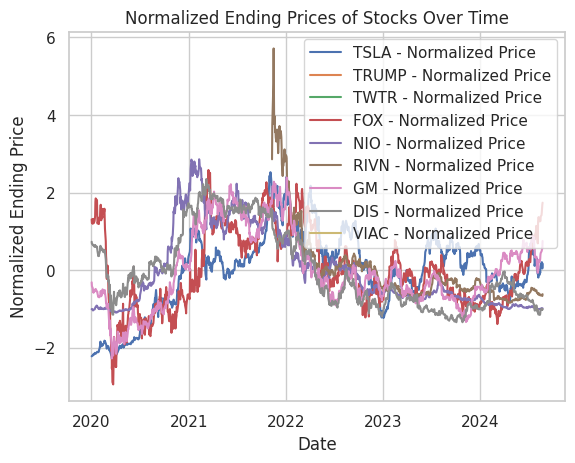

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform data for each stock
for ticker in tickers:
    ticker_data = final_df[final_df['Stock Name'] == ticker]
    ticker_data['Normalized Ending Price'] = scaler.fit_transform(ticker_data[['Ending Price']])
    plt.plot(ticker_data['Date'], ticker_data['Normalized Ending Price'], label=f'{ticker} - Normalized Price')

plt.xlabel('Date')
plt.ylabel('Normalized Ending Price')
plt.title('Normalized Ending Prices of Stocks Over Time')
plt.legend()
plt.grid(True)
plt.show()


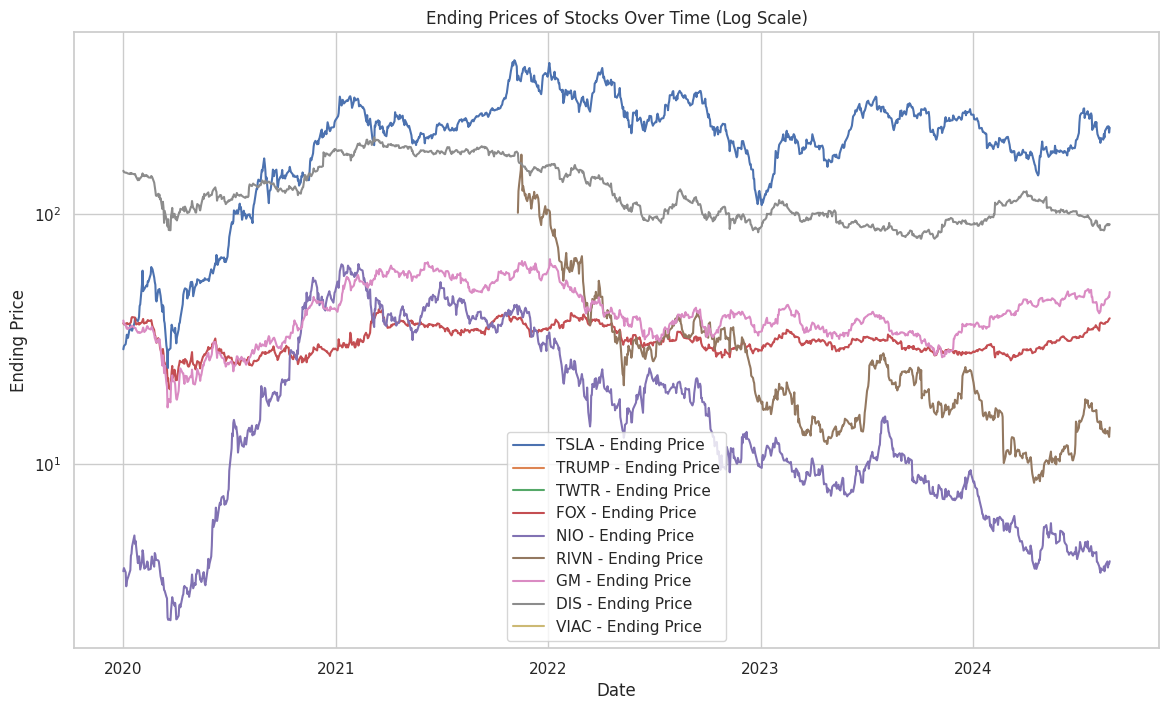

In [15]:
plt.figure(figsize=(14, 8))

for ticker in tickers:
    ticker_data = final_df[final_df['Stock Name'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Ending Price'], label=f'{ticker} - Ending Price')

plt.xlabel('Date')
plt.ylabel('Ending Price')
plt.yscale('log')  # Use log scale for y-axis
plt.title('Ending Prices of Stocks Over Time (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_612/2069548656.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Rolling Average'] = ticker_data['Ending Price'].rolling(window=window_size).mean()
/tmp/ipykernel_612/2069548656.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Rolling Average'] = ticker_data['Ending Price'].rolling(window=window_size).mean()
/tmp/ipykernel_612/2069548656.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

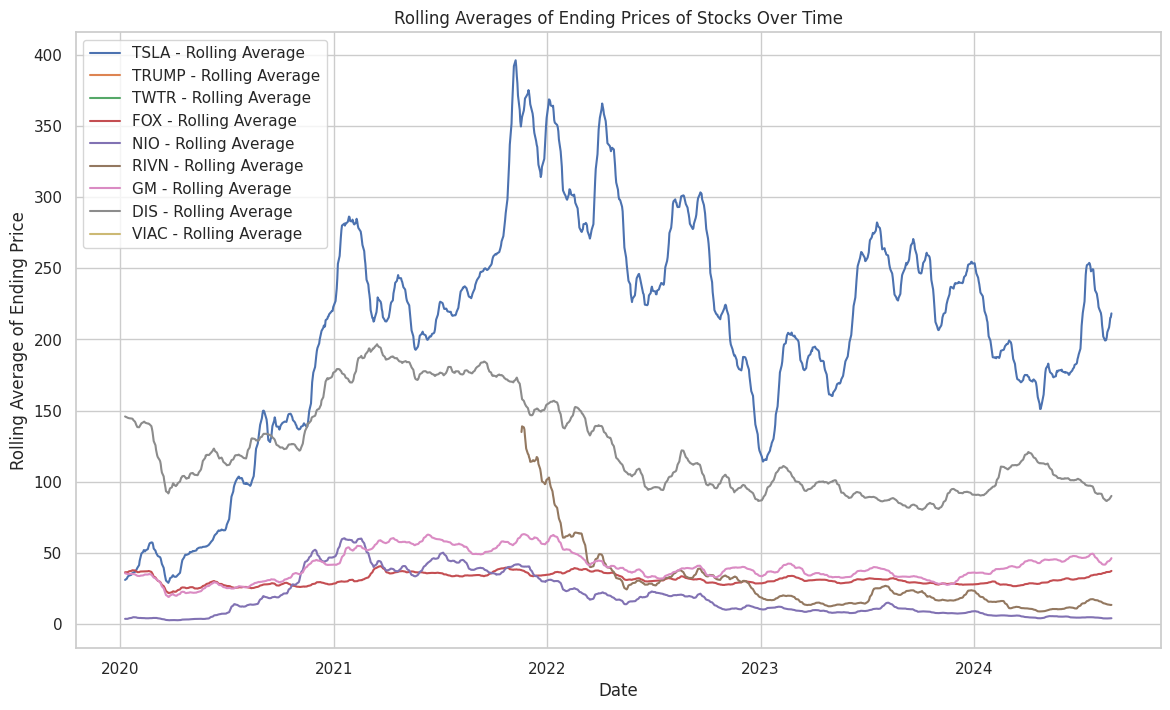

In [16]:
plt.figure(figsize=(14, 8))

window_size = 7  # Adjust window size as needed

for ticker in tickers:
    ticker_data = final_df[final_df['Stock Name'] == ticker]
    ticker_data['Rolling Average'] = ticker_data['Ending Price'].rolling(window=window_size).mean()
    plt.plot(ticker_data['Date'], ticker_data['Rolling Average'], label=f'{ticker} - Rolling Average')

plt.xlabel('Date')
plt.ylabel('Rolling Average of Ending Price')
plt.title('Rolling Averages of Ending Prices of Stocks Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Drop rows with any null values
df_cleaned = final_df.dropna()

print("DataFrame after dropping rows with any null values:")
print(df_cleaned)

DataFrame after dropping rows with any null values:
                          Date Stock Name  Starting Price  Ending Price  \
0    2020-01-02 00:00:00+00:00       TSLA       28.299999     28.684000   
0    2020-01-02 00:00:00+00:00        NIO        4.100000      3.720000   
0    2020-01-02 00:00:00+00:00        DIS      145.289993    148.199997   
0    2020-01-02 00:00:00+00:00         GM       37.000000     37.380001   
0    2020-01-02 00:00:00+00:00        FOX       36.500000     36.459999   
...                        ...        ...             ...           ...   
1168 2024-08-23 00:00:00+00:00         GM       47.310001     48.570000   
1168 2024-08-23 00:00:00+00:00        DIS       90.150002     90.559998   
1168 2024-08-23 00:00:00+00:00       TSLA      214.460007    220.320007   
1168 2024-08-23 00:00:00+00:00        FOX       38.040001     38.139999   
1168 2024-08-23 00:00:00+00:00       RIVN       12.920000     13.960000   

      Price Change  
0         0.384001  
0    

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format and sort by date
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned = df_cleaned.sort_values(by='Date')

# Pivot the dataframe to have one column per stock with ending prices
pivot_df = df_cleaned.pivot(index='Date', columns='Stock Name', values='Ending Price')

# Compute the correlation matrix
correlation_matrix = pivot_df.corr()

# Display the correlation matrix
print(correlation_matrix)


Stock Name       DIS       FOX        GM       NIO      RIVN      TSLA
Stock Name                                                            
DIS         1.000000  0.555330  0.723211  0.842993  0.785030  0.216777
FOX         0.555330  1.000000  0.734671  0.398468  0.563060  0.495212
GM          0.723211  0.734671  1.000000  0.698343  0.712728  0.603293
NIO         0.842993  0.398468  0.698343  1.000000  0.914720  0.450724
RIVN        0.785030  0.563060  0.712728  0.914720  1.000000  0.744739
TSLA        0.216777  0.495212  0.603293  0.450724  0.744739  1.000000


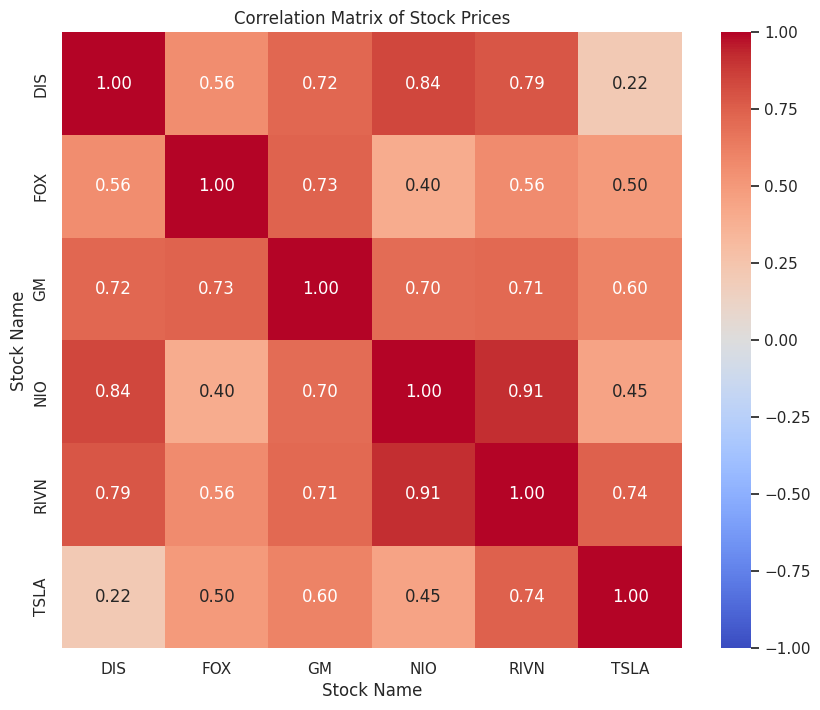

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Prices')
plt.show()


In [32]:
import yfinance as yf

# Download historical data for Twitter
twitter_data = yf.download('TWTR', start='2020-01-01', end='2022-10-27')

# Check for null values
print(twitter_data.isnull().sum())


[*********************100%***********************]  1 of 1 completed

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [62]:
import datetime
import yfinance as yf
import pandas as pd

# Define the ticker symbols and date range
tickers = ['TSLA', 'DJT','FOX', 'NIO', 'RIVN', 'GM', 'DIS']
start = datetime.datetime(2024, 1, 1)
end = datetime.datetime(2024, 8, 24)

# Download historical data from Yahoo Finance
data = yf.download(tickers, start=start, end=end)

# Flatten the multi-level columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]
data.reset_index(inplace=True)

# Create a DataFrame to store the required information
results = []

# Loop through each ticker and extract relevant data
for ticker in tickers:
    if f'Open_{ticker}' in data.columns and f'Close_{ticker}' in data.columns:
        ticker_data = data.loc[:, ['Date', f'Open_{ticker}', f'Close_{ticker}']].copy()
        ticker_data.rename(columns={f'Open_{ticker}': 'Starting Price', f'Close_{ticker}': 'Ending Price'}, inplace=True)
        ticker_data['Stock Name'] = ticker
        ticker_data['Price Change'] = ticker_data['Ending Price'] - ticker_data['Starting Price']
        results.append(ticker_data)

# Concatenate all results into a single DataFrame
final_df = pd.concat(results, ignore_index=True)

# Select and order the columns as needed
final_df = final_df[['Date', 'Stock Name', 'Starting Price', 'Ending Price', 'Price Change']]

# Display the final DataFrame
print(final_df)


[*********************100%***********************]  7 of 7 completed

                          Date Stock Name  Starting Price  Ending Price  \
0    2024-01-02 00:00:00+00:00       TSLA      250.080002    248.419998   
1    2024-01-03 00:00:00+00:00       TSLA      244.979996    238.449997   
2    2024-01-04 00:00:00+00:00       TSLA      239.250000    237.929993   
3    2024-01-05 00:00:00+00:00       TSLA      236.860001    237.490005   
4    2024-01-08 00:00:00+00:00       TSLA      236.139999    240.449997   
...                        ...        ...             ...           ...   
1136 2024-08-19 00:00:00+00:00        DIS       89.410004     90.820000   
1137 2024-08-20 00:00:00+00:00        DIS       90.389999     89.739998   
1138 2024-08-21 00:00:00+00:00        DIS       90.220001     90.720001   
1139 2024-08-22 00:00:00+00:00        DIS       90.989998     89.919998   
1140 2024-08-23 00:00:00+00:00        DIS       90.150002     90.559998   

      Price Change  
0        -1.660004  
1        -6.529999  
2        -1.320007  
3         0.630

In [63]:
nulls_by_ticker = final_df[final_df['Ending Price'].isnull()].groupby('Stock Name').size()

# Display tickers with null values
print("Stock tickers with null values:")
print(nulls_by_ticker)

Stock tickers with null values:
Series([], dtype: int64)


/tmp/ipykernel_612/3008213645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Normalized Ending Price'] = scaler.fit_transform(ticker_data[['Ending Price']])
/tmp/ipykernel_612/3008213645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Normalized Ending Price'] = scaler.fit_transform(ticker_data[['Ending Price']])
/tmp/ipykernel_612/3008213645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

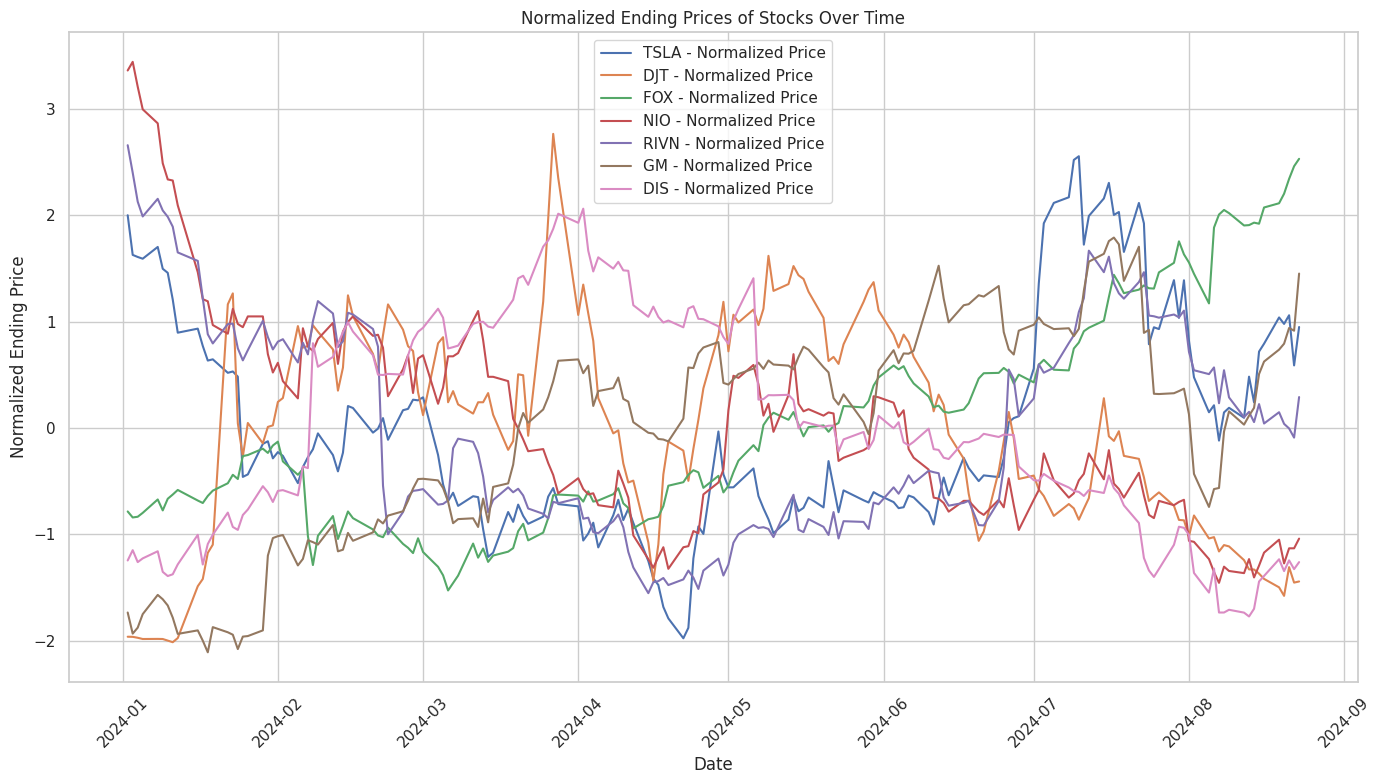

In [64]:
plt.figure(figsize=(14, 8))

for ticker in tickers:
    ticker_data = final_df[final_df['Stock Name'] == ticker]
    ticker_data['Normalized Ending Price'] = scaler.fit_transform(ticker_data[['Ending Price']])
    plt.plot(ticker_data['Date'], ticker_data['Normalized Ending Price'], label=f'{ticker} - Normalized Price')

plt.xlabel('Date')
plt.ylabel('Normalized Ending Price')
plt.title('Normalized Ending Prices of Stocks Over Time')
plt.legend()
plt.grid(True)

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated labels

plt.show()


/tmp/ipykernel_612/2211385460.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Normalized Ending Price'] = scaler.fit_transform(ticker_data[['Ending Price']])
/tmp/ipykernel_612/2211385460.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Normalized Ending Price'] = scaler.fit_transform(ticker_data[['Ending Price']])
/tmp/ipykernel_612/2211385460.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

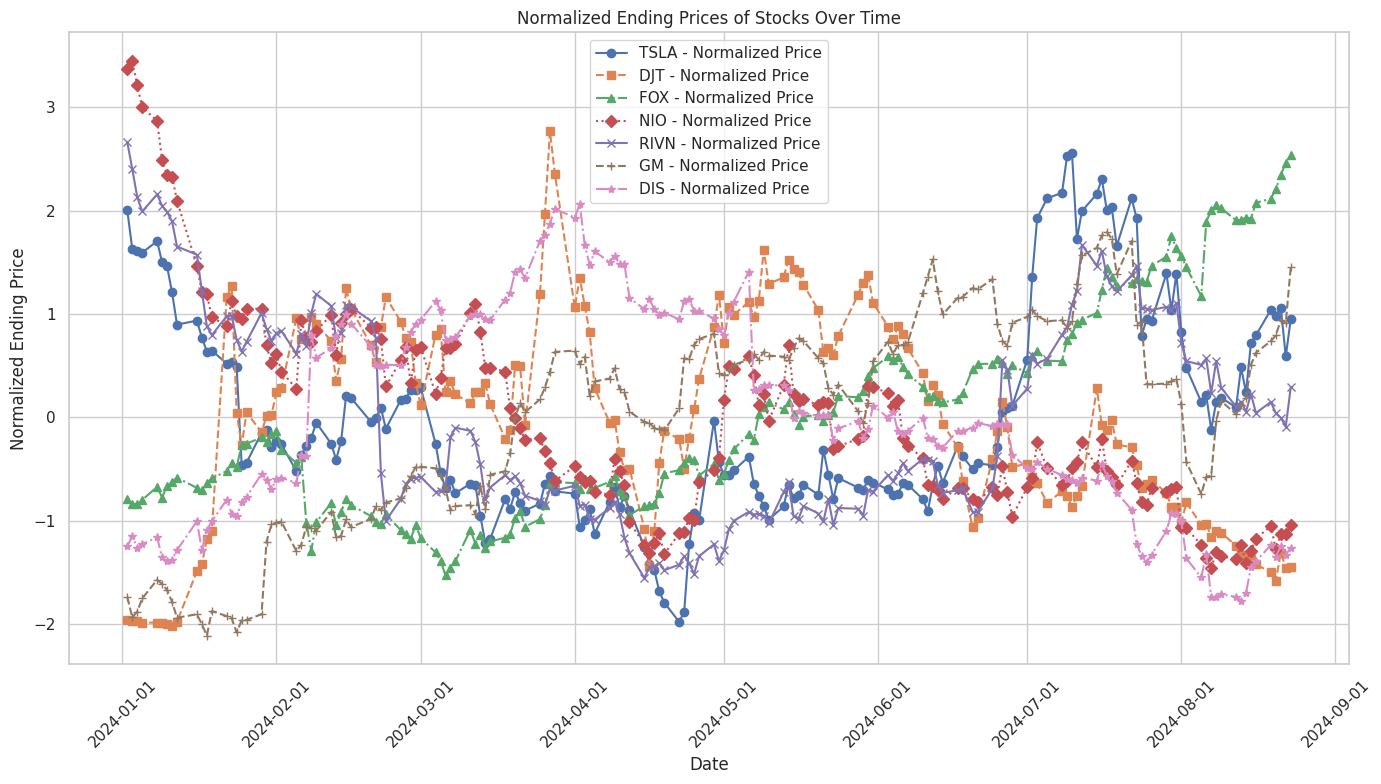

In [65]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Define marker styles and line styles for variety
markers = ['o', 's', '^', 'D', 'x', '+', '*', 'p', 'H']
line_styles = ['-', '--', '-.', ':']

plt.figure(figsize=(14, 8))

for idx, ticker in enumerate(tickers):
    ticker_data = final_df[final_df['Stock Name'] == ticker]
    ticker_data['Normalized Ending Price'] = scaler.fit_transform(ticker_data[['Ending Price']])
    # Use markers and line styles for differentiation
    plt.plot(ticker_data['Date'], ticker_data['Normalized Ending Price'], 
             label=f'{ticker} - Normalized Price',
             marker=markers[idx % len(markers)],
             linestyle=line_styles[idx % len(line_styles)],
             markersize=6)

plt.xlabel('Date')
plt.ylabel('Normalized Ending Price')
plt.title('Normalized Ending Prices of Stocks Over Time')
plt.legend()
plt.grid(True)

# Set date format and locator on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated labels

plt.show()


In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format and sort by date
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df = final_df.sort_values(by='Date')

# Pivot the dataframe to have one column per stock with ending prices
pivot_df = final_df.pivot(index='Date', columns='Stock Name', values='Ending Price')

# Compute the correlation matrix
correlation_matrix = pivot_df.corr()

# Display the correlation matrix
print(correlation_matrix)


Stock Name       DIS       DJT       FOX        GM       NIO      RIVN  \
Stock Name                                                               
DIS         1.000000  0.634521 -0.685430  0.105631 -0.054041 -0.665300   
DJT         0.634521  1.000000 -0.382842  0.138846 -0.006885 -0.494502   
FOX        -0.685430 -0.382842  1.000000  0.527679 -0.565702  0.228474   
GM          0.105631  0.138846  0.527679  1.000000 -0.716589 -0.378994   
NIO        -0.054041 -0.006885 -0.565702 -0.716589  1.000000  0.473833   
RIVN       -0.665300 -0.494502  0.228474 -0.378994  0.473833  1.000000   
TSLA       -0.660554 -0.519397  0.451800  0.015138  0.194493  0.807686   

Stock Name      TSLA  
Stock Name            
DIS        -0.660554  
DJT        -0.519397  
FOX         0.451800  
GM          0.015138  
NIO         0.194493  
RIVN        0.807686  
TSLA        1.000000  


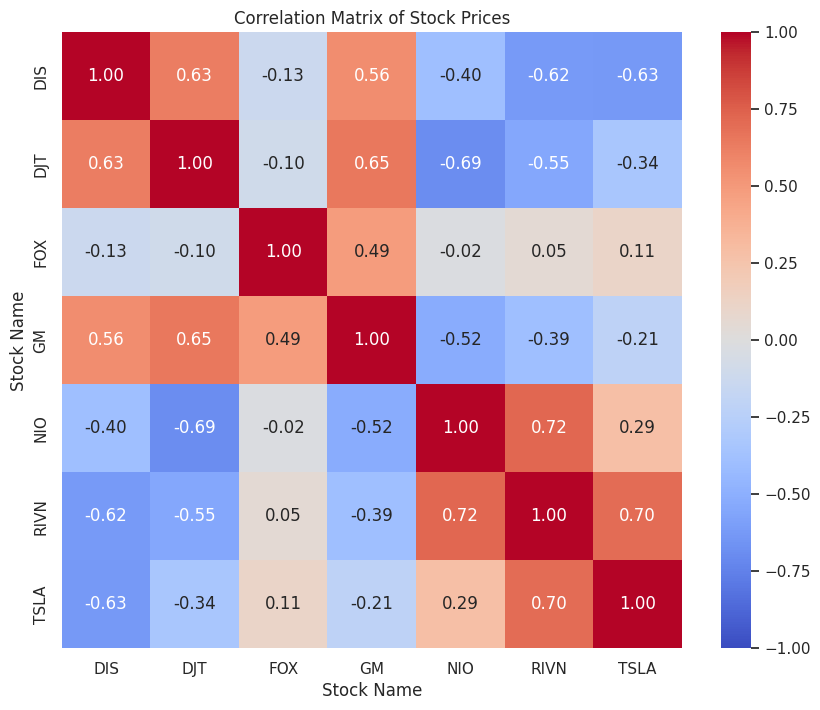

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Prices')
plt.show()


In [67]:
import datetime
import yfinance as yf
import pandas as pd

# Define the ticker symbols and date range
tickers = ['TSLA', 'DJT','FOX', 'NIO', 'RIVN', 'GM', 'DIS']
start = datetime.datetime(2024, 1, 1)
end = datetime.datetime(2024, 8, 24)

# Download historical data from Yahoo Finance
data = yf.download(tickers, start=start, end=end)

# Flatten the multi-level columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]
data.reset_index(inplace=True)

# Create a DataFrame to store the required information
results = []

# Loop through each ticker and extract relevant data
for ticker in tickers:
    if f'Open_{ticker}' in data.columns and f'Close_{ticker}' in data.columns:
        ticker_data = data.loc[:, ['Date', f'Open_{ticker}', f'Close_{ticker}', f'Volume_{ticker}']].copy()
        ticker_data.rename(columns={f'Open_{ticker}': 'Starting Price', f'Close_{ticker}': 'Ending Price', f'Volume_{ticker}': 'Volume'}, inplace=True)
        ticker_data['Stock Name'] = ticker
        ticker_data['Price Change'] = ticker_data['Ending Price'] - ticker_data['Starting Price']
        ticker_data['Daily Return'] = ticker_data['Ending Price'].pct_change()
        results.append(ticker_data)

# Concatenate all results into a single DataFrame
final_df = pd.concat(results, ignore_index=True)

# Calculate additional statistics if needed
final_df['Moving Average'] = final_df.groupby('Stock Name')['Ending Price'].transform(lambda x: x.rolling(window=50).mean())

# Select and order the columns as needed
final_df = final_df[['Date', 'Stock Name', 'Starting Price', 'Ending Price', 'Price Change', 'Volume', 'Daily Return', 'Moving Average']]

# Display the final DataFrame
print(final_df)

# Calculate and display the correlation matrix of daily returns
returns_df = final_df.pivot(index='Date', columns='Stock Name', values='Daily Return')
correlation_matrix = returns_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)


[*********************100%***********************]  7 of 7 completed

                          Date Stock Name  Starting Price  Ending Price  \
0    2024-01-02 00:00:00+00:00       TSLA      250.080002    248.419998   
1    2024-01-03 00:00:00+00:00       TSLA      244.979996    238.449997   
2    2024-01-04 00:00:00+00:00       TSLA      239.250000    237.929993   
3    2024-01-05 00:00:00+00:00       TSLA      236.860001    237.490005   
4    2024-01-08 00:00:00+00:00       TSLA      236.139999    240.449997   
...                        ...        ...             ...           ...   
1136 2024-08-19 00:00:00+00:00        DIS       89.410004     90.820000   
1137 2024-08-20 00:00:00+00:00        DIS       90.389999     89.739998   
1138 2024-08-21 00:00:00+00:00        DIS       90.220001     90.720001   
1139 2024-08-22 00:00:00+00:00        DIS       90.989998     89.919998   
1140 2024-08-23 00:00:00+00:00        DIS       90.150002     90.559998   

      Price Change     Volume  Daily Return  Moving Average  
0        -1.660004  104654200        

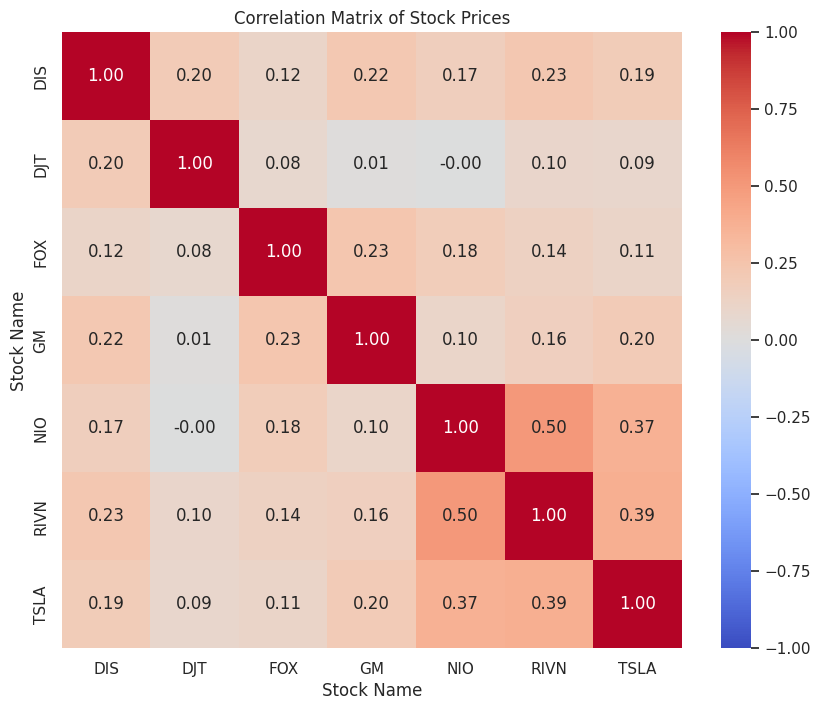

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Prices')
plt.show()


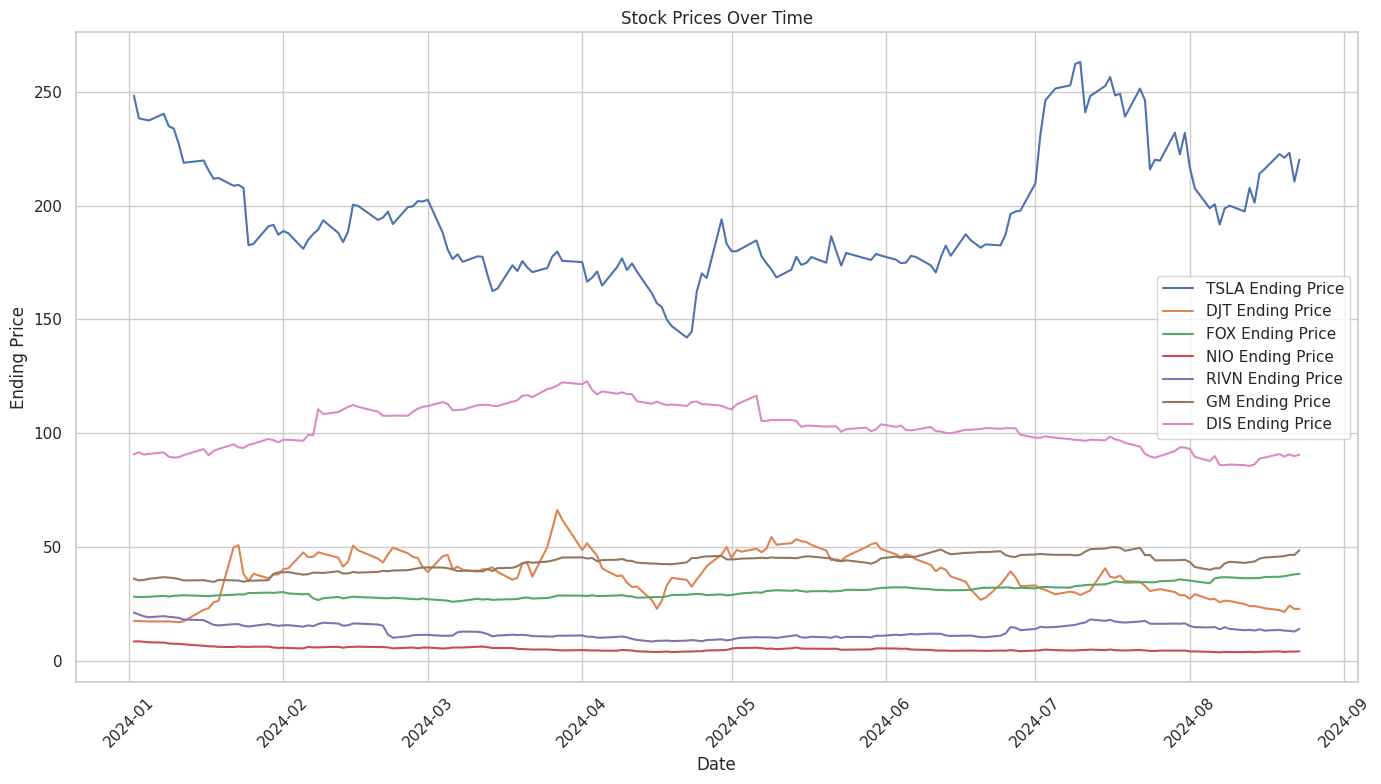

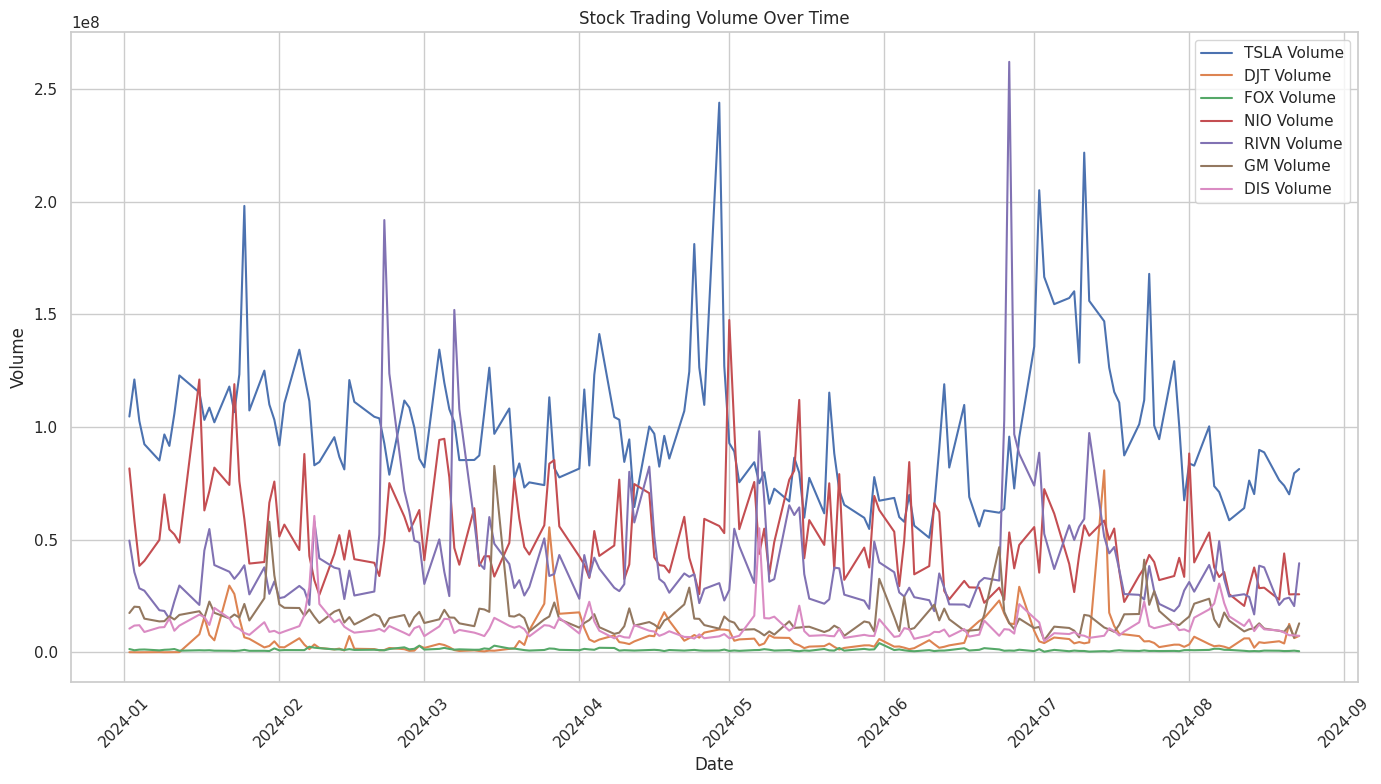

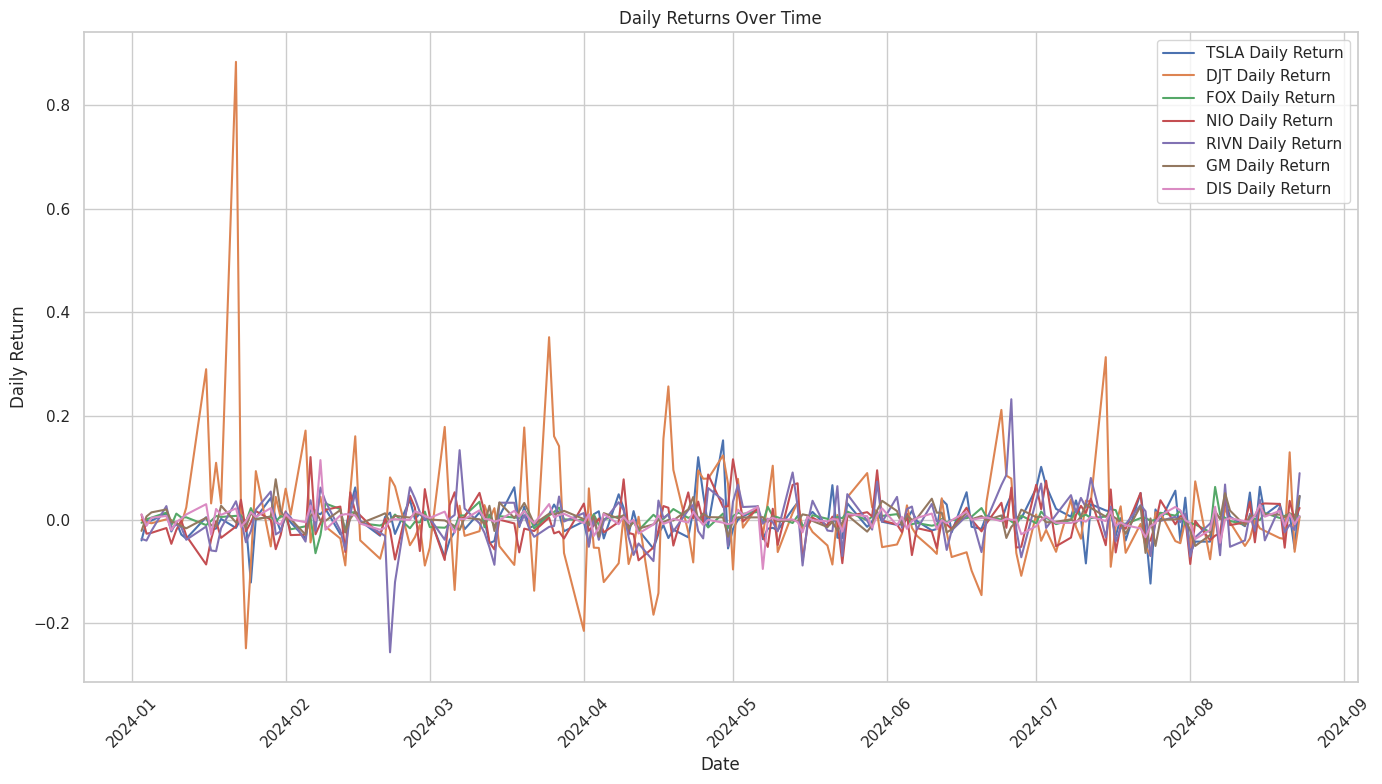

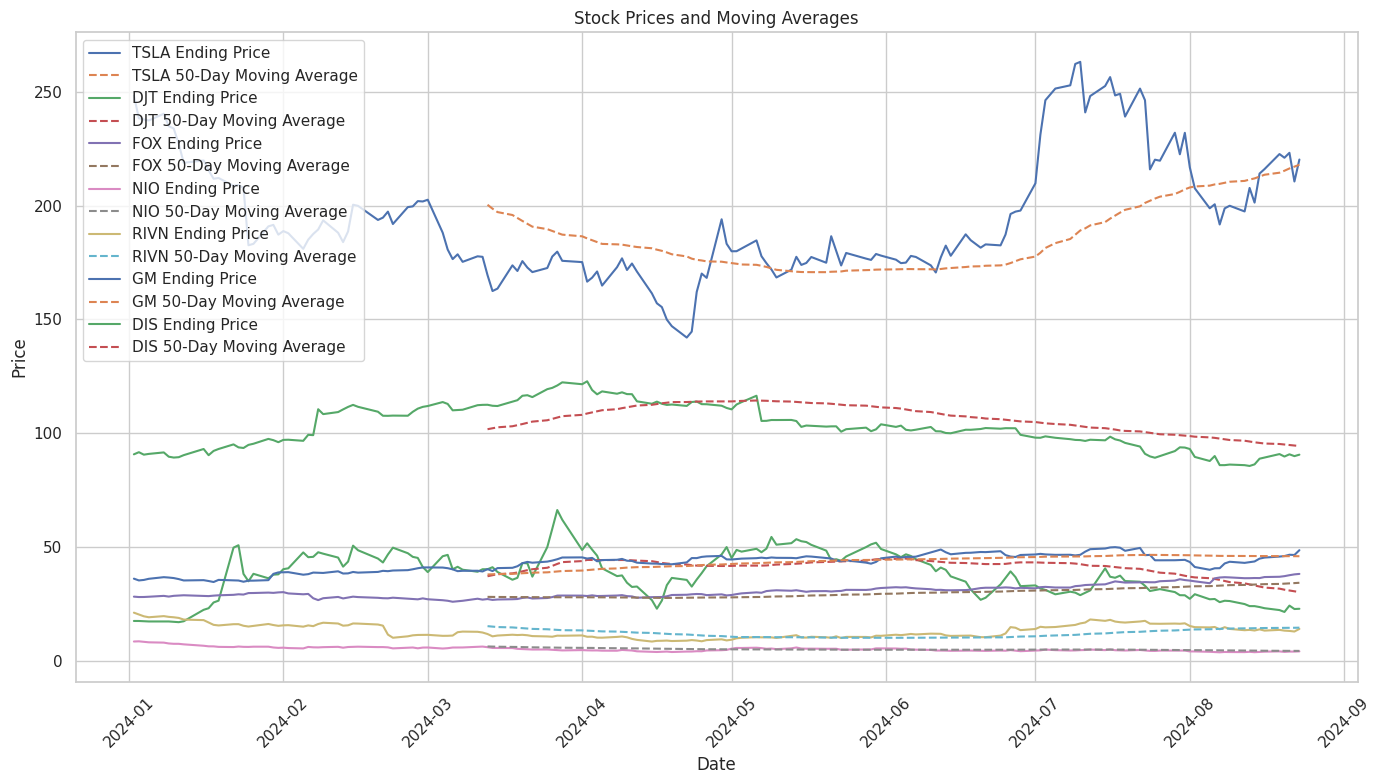

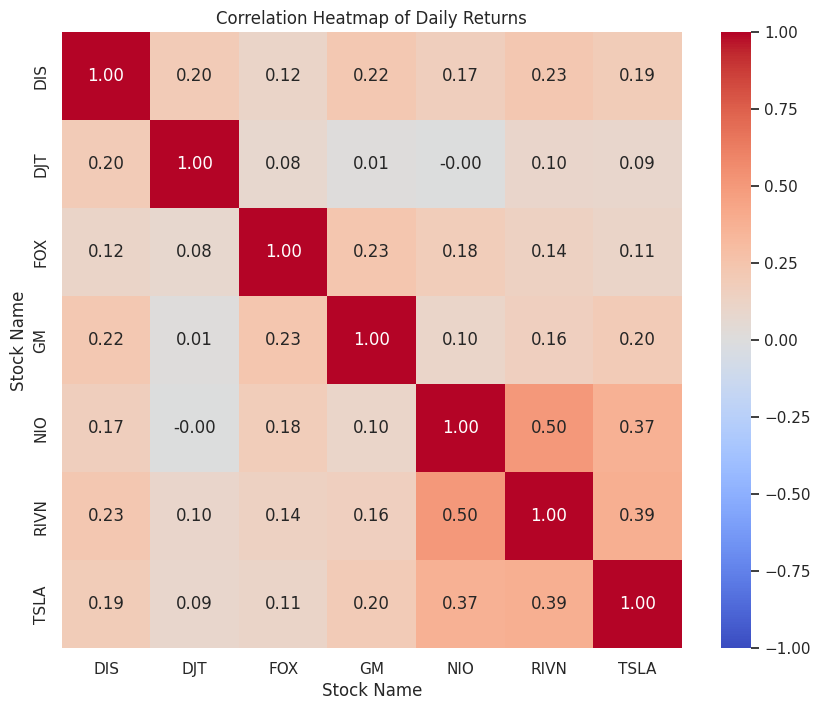

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting time series of stock prices
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(final_df[final_df['Stock Name'] == ticker]['Date'],
             final_df[final_df['Stock Name'] == ticker]['Ending Price'],
             label=f'{ticker} Ending Price')

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Ending Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting volume over time
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(final_df[final_df['Stock Name'] == ticker]['Date'],
             final_df[final_df['Stock Name'] == ticker]['Volume'],
             label=f'{ticker} Volume')

plt.title('Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting daily returns
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(final_df[final_df['Stock Name'] == ticker]['Date'],
             final_df[final_df['Stock Name'] == ticker]['Daily Return'],
             label=f'{ticker} Daily Return')

plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting moving averages
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(final_df[final_df['Stock Name'] == ticker]['Date'],
             final_df[final_df['Stock Name'] == ticker]['Ending Price'],
             label=f'{ticker} Ending Price')
    plt.plot(final_df[final_df['Stock Name'] == ticker]['Date'],
             final_df[final_df['Stock Name'] == ticker]['Moving Average'],
             label=f'{ticker} 50-Day Moving Average', linestyle='--')

plt.title('Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Daily Returns')
plt.show()


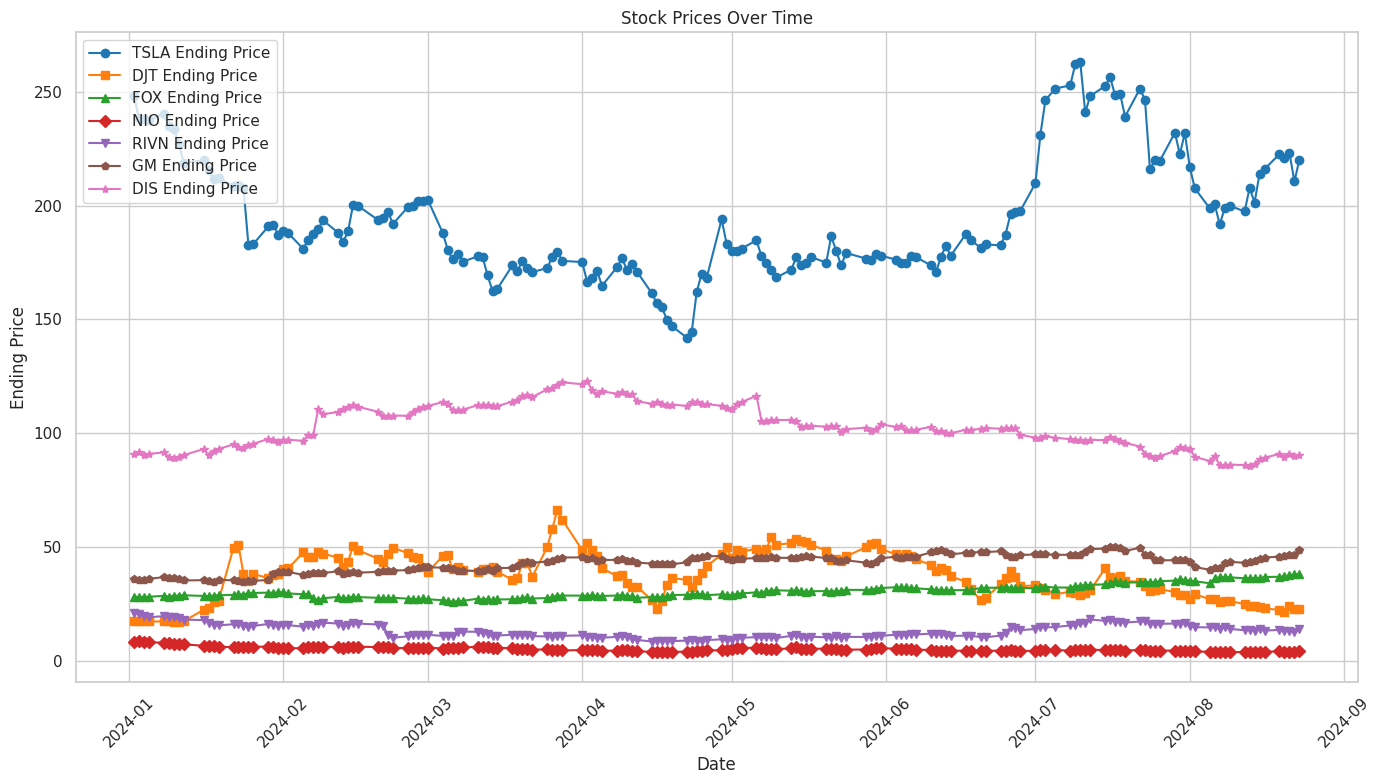

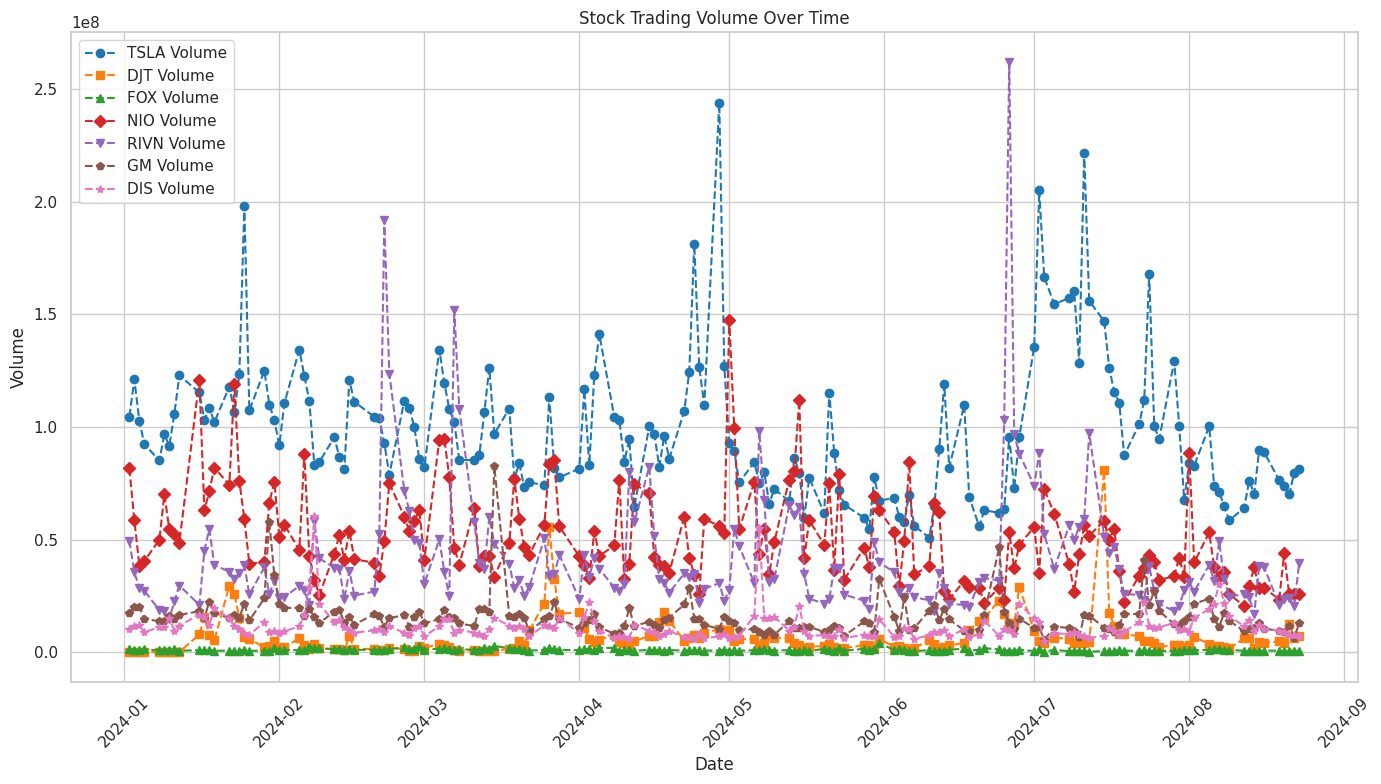

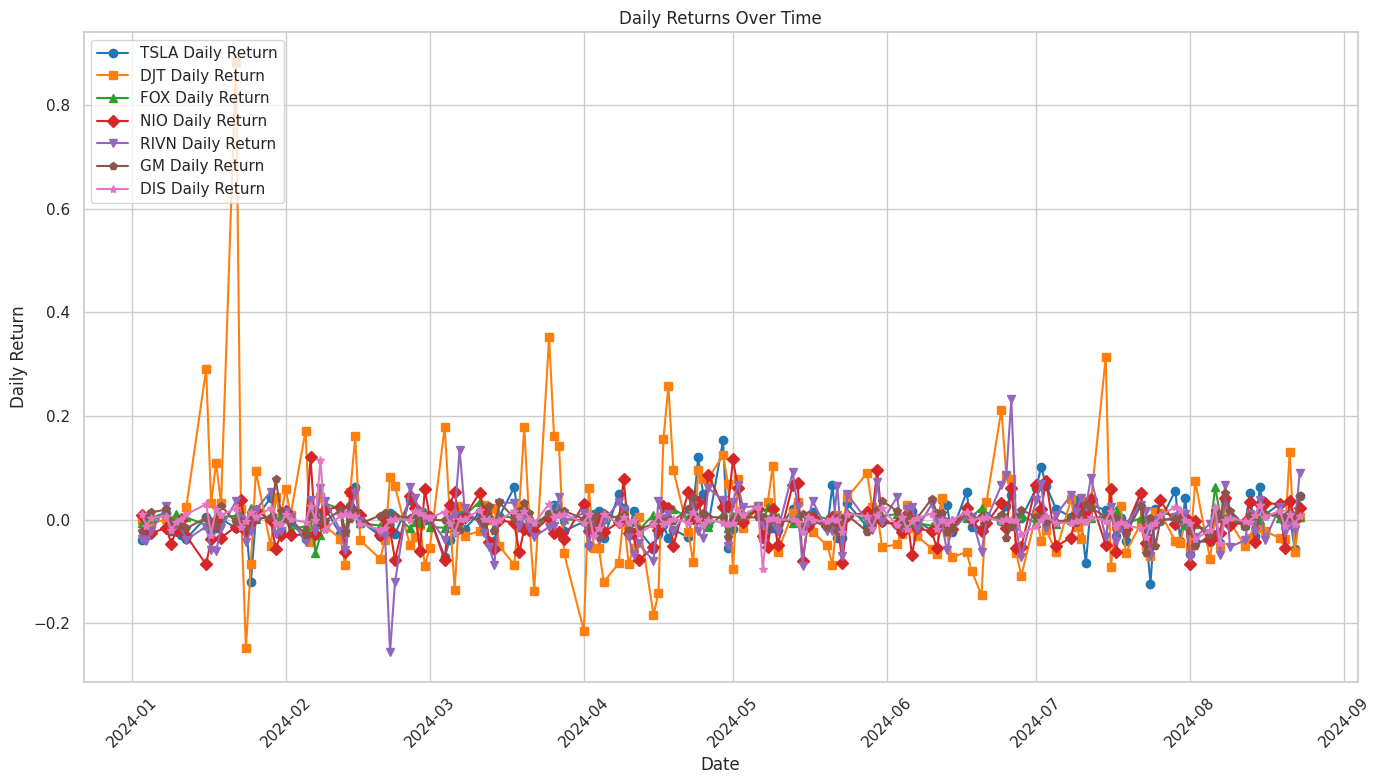

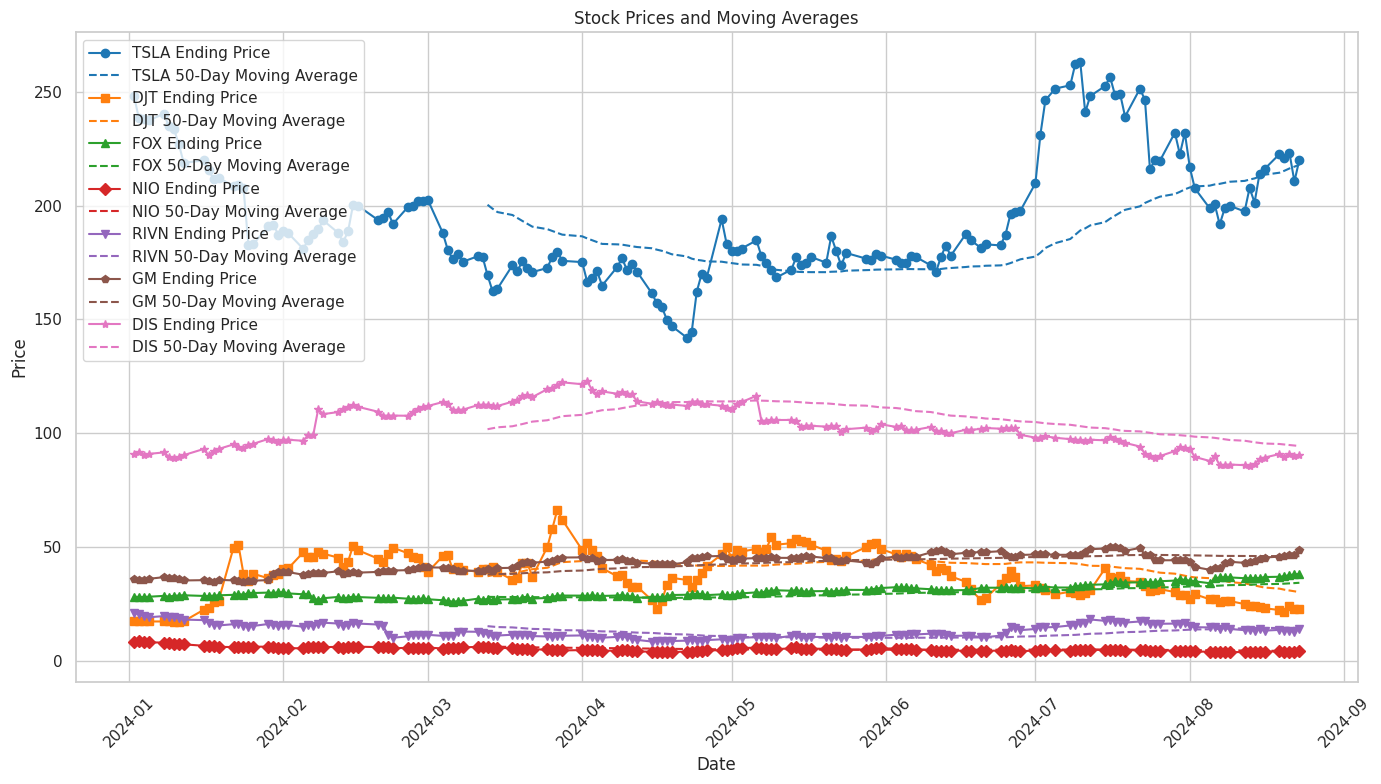

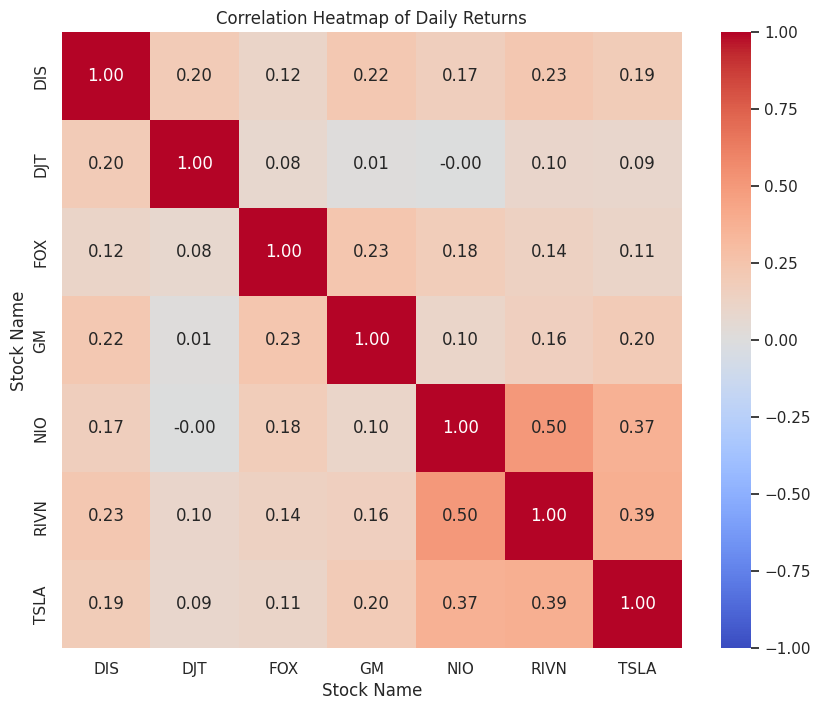

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Define colors and markers for each ticker
colors = sns.color_palette("tab10", len(tickers))
markers = ['o', 's', '^', 'D', 'v', 'p', '*']

# Plotting time series of stock prices with different markers
plt.figure(figsize=(14, 8))
for i, ticker in enumerate(tickers):
    plt.plot(final_df[final_df['Stock Name'] == ticker]['Date'],
             final_df[final_df['Stock Name'] == ticker]['Ending Price'],
             label=f'{ticker} Ending Price',
             color=colors[i],
             marker=markers[i],
             linestyle='-')

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Ending Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting volume over time with different markers
plt.figure(figsize=(14, 8))
for i, ticker in enumerate(tickers):
    plt.plot(final_df[final_df['Stock Name'] == ticker]['Date'],
             final_df[final_df['Stock Name'] == ticker]['Volume'],
             label=f'{ticker} Volume',
             color=colors[i],
             marker=markers[i],
             linestyle='--')

plt.title('Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting daily returns with different markers
plt.figure(figsize=(14, 8))
for i, ticker in enumerate(tickers):
    plt.plot(final_df[final_df['Stock Name'] == ticker]['Date'],
             final_df[final_df['Stock Name'] == ticker]['Daily Return'],
             label=f'{ticker} Daily Return',
             color=colors[i],
             marker=markers[i],
             linestyle='-')

plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting moving averages with different markers
plt.figure(figsize=(14, 8))
for i, ticker in enumerate(tickers):
    plt.plot(final_df[final_df['Stock Name'] == ticker]['Date'],
             final_df[final_df['Stock Name'] == ticker]['Ending Price'],
             label=f'{ticker} Ending Price',
             color=colors[i],
             marker=markers[i],
             linestyle='-')
    plt.plot(final_df[final_df['Stock Name'] == ticker]['Date'],
             final_df[final_df['Stock Name'] == ticker]['Moving Average'],
             label=f'{ticker} 50-Day Moving Average',
             color=colors[i],
             linestyle='--')

plt.title('Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Daily Returns')
plt.show()


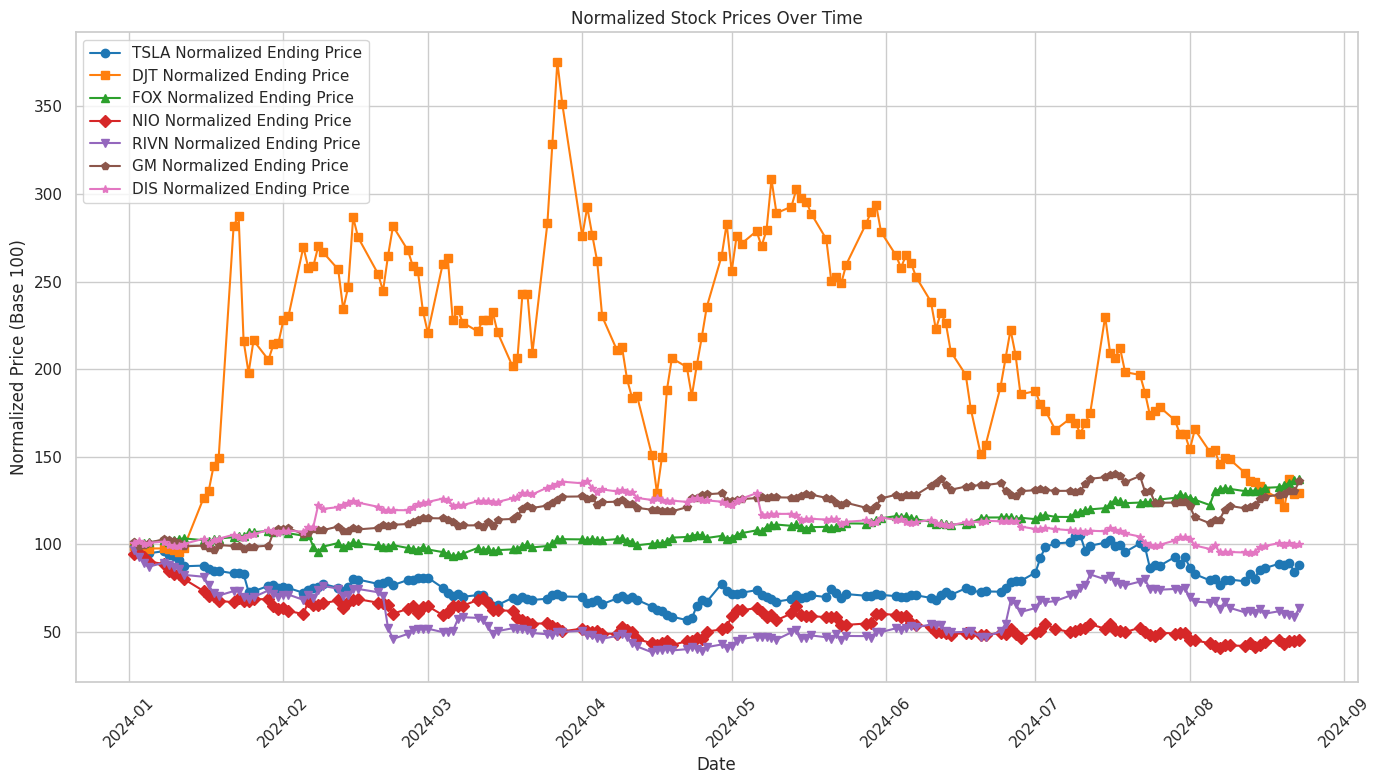

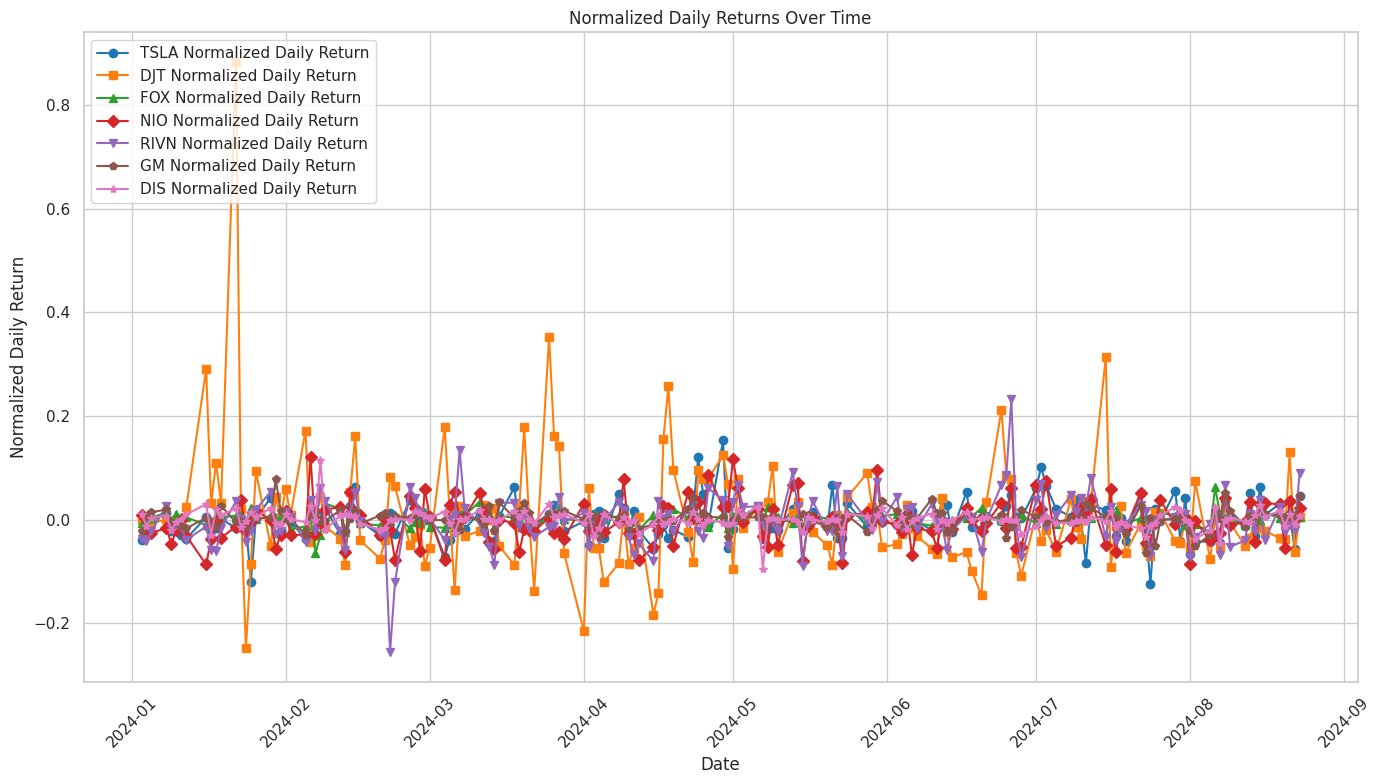

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for seaborn
sns.set(style="whitegrid")

# Define colors and markers for each ticker
colors = sns.color_palette("tab10", len(tickers))
markers = ['o', 's', '^', 'D', 'v', 'p', '*']

# Normalize the data
normalized_results = []
for ticker in tickers:
    if f'Open_{ticker}' in data.columns and f'Close_{ticker}' in data.columns:
        ticker_data = data.loc[:, ['Date', f'Open_{ticker}', f'Close_{ticker}']].copy()
        ticker_data.rename(columns={f'Open_{ticker}': 'Starting Price', f'Close_{ticker}': 'Ending Price'}, inplace=True)
        ticker_data['Stock Name'] = ticker
        ticker_data['Price Change'] = ticker_data['Ending Price'] - ticker_data['Starting Price']
        
        # Normalize the prices
        start_price = ticker_data['Starting Price'].iloc[0]
        ticker_data['Normalized Starting Price'] = ticker_data['Starting Price'] / start_price * 100
        ticker_data['Normalized Ending Price'] = ticker_data['Ending Price'] / start_price * 100
        
        normalized_results.append(ticker_data)

# Concatenate all normalized results into a single DataFrame
normalized_df = pd.concat(normalized_results, ignore_index=True)

# Plotting normalized time series of stock prices
plt.figure(figsize=(14, 8))
for i, ticker in enumerate(tickers):
    plt.plot(normalized_df[normalized_df['Stock Name'] == ticker]['Date'],
             normalized_df[normalized_df['Stock Name'] == ticker]['Normalized Ending Price'],
             label=f'{ticker} Normalized Ending Price',
             color=colors[i],
             marker=markers[i],
             linestyle='-')

plt.title('Normalized Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base 100)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting normalized daily returns
plt.figure(figsize=(14, 8))
for i, ticker in enumerate(tickers):
    normalized_returns = normalized_df[normalized_df['Stock Name'] == ticker]['Normalized Ending Price'].pct_change()
    plt.plot(normalized_df[normalized_df['Stock Name'] == ticker]['Date'],
             normalized_returns,
             label=f'{ticker} Normalized Daily Return',
             color=colors[i],
             marker=markers[i],
             linestyle='-')

plt.title('Normalized Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Daily Return')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


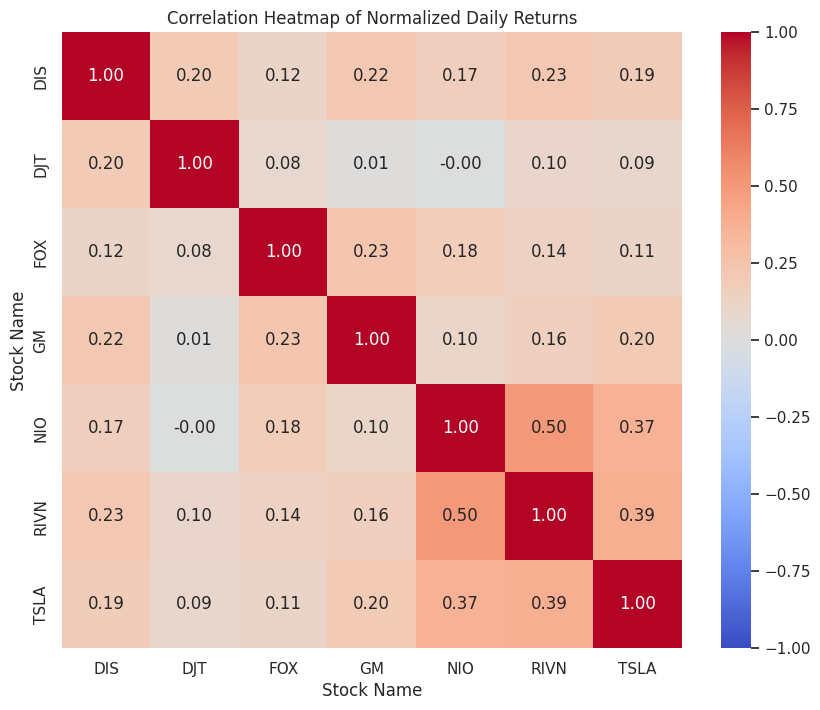

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Define colors and markers for each ticker
colors = sns.color_palette("tab10", len(tickers))
markers = ['o', 's', '^', 'D', 'v', 'p', '*']

# Normalize the data and compute daily returns
normalized_results = []
for ticker in tickers:
    if f'Open_{ticker}' in data.columns and f'Close_{ticker}' in data.columns:
        ticker_data = data.loc[:, ['Date', f'Open_{ticker}', f'Close_{ticker}']].copy()
        ticker_data.rename(columns={f'Open_{ticker}': 'Starting Price', f'Close_{ticker}': 'Ending Price'}, inplace=True)
        ticker_data['Stock Name'] = ticker
        ticker_data['Price Change'] = ticker_data['Ending Price'] - ticker_data['Starting Price']
        
        # Normalize the prices
        start_price = ticker_data['Starting Price'].iloc[0]
        ticker_data['Normalized Starting Price'] = ticker_data['Starting Price'] / start_price * 100
        ticker_data['Normalized Ending Price'] = ticker_data['Ending Price'] / start_price * 100
        
        # Compute daily returns based on normalized prices
        ticker_data['Normalized Daily Return'] = ticker_data['Normalized Ending Price'].pct_change()
        
        normalized_results.append(ticker_data)

# Concatenate all normalized results into a single DataFrame
normalized_df = pd.concat(normalized_results, ignore_index=True)

# Pivot the DataFrame to get daily returns for correlation calculation
returns_df = normalized_df.pivot(index='Date', columns='Stock Name', values='Normalized Daily Return')

# Compute the correlation matrix of normalized daily returns
correlation_matrix = returns_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Normalized Daily Returns')
plt.show()
